# Data Processing: 8-class Data

In [1]:
import pandas as pd
import numpy as np


In [2]:
file = '8classdata.txt'
label_file = '8classlabel.txt'

In [3]:
# read data
data = pd.read_csv(file, sep=' ', header = None)
class_label = pd.read_csv(label_file, header = None)


In [4]:
# feature data
data = pd.DataFrame(data)
data = data[[3,6,9,12,15,18]]
# print(data)


In [5]:
# feature used in clustering
feature_data = np.array(data)
feature_data.shape


(16384, 6)

In [6]:
# label
class_label = pd.DataFrame(class_label, dtype='int')
# class_label

#label
label = np.array(class_label[0])
label

array([1, 1, 1, ..., 5, 5, 5])

In [7]:
# class_label[0].unique()

# ISOMAP

In [8]:
## ISOMAP
import sklearn as learn
from sklearn.manifold import Isomap


In [9]:
# parameters
my_neighbors = 8
my_components = 2


In [10]:
# model
embedding = Isomap(n_neighbors = my_neighbors, n_components = my_components)

# data
X = feature_data

# fitting
X_transformed = embedding.fit_transform(X)

# Visualization for ISOMAP

In [11]:
import matplotlib
import matplotlib.pyplot as plt


In [12]:
# reshape for visualization

X_reshaped = X_transformed.transpose()

print(X_transformed.shape)
print(X_reshaped.shape)

(16384, 2)
(2, 16384)


In [31]:
X_reshaped

array([[ 1.07398680e-03,  9.58188370e-04,  8.80553750e-04, ...,
         1.01083473e-03,  9.06056494e-04,  8.41152594e-04],
       [ 1.12350219e+00,  1.84743581e+00,  3.72612043e+00, ...,
        -2.57998243e-03,  2.06011268e-03,  1.32865215e-03]])

In [27]:
# get index for label 
label_index = []
for i in range(1,9):
    index = class_label[class_label[0] == i]
    label_index.append(list(index.index))

print(len(label_index[0]))

4096


In [32]:
X_reshaped[0][label_index[0]]

array([0.00107399, 0.00095819, 0.00088055, ..., 0.00104212, 0.00079193,
       0.00093324])

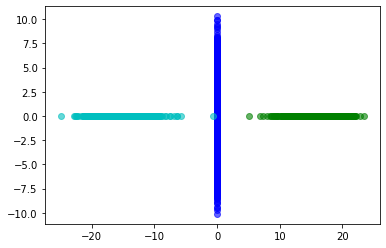

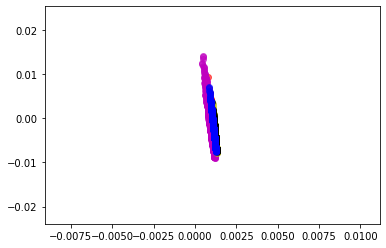

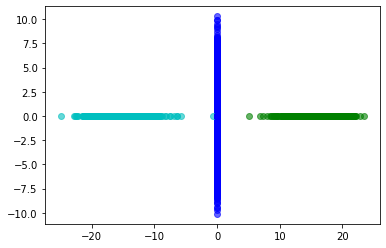

In [49]:
# after ISOMAP
d = X_reshaped
colors = ['b', 'g','r','c','m','y','k', 'b']

# plt.subplots(3, 1, sharex=True, sharey=True)

# 0, 1, 3
for i in range(2):
    plt.scatter(d[0][label_index[i]], d[1][label_index[i]], c=colors[i], alpha=0.6) 
i=3
plt.scatter(d[0][label_index[i]], d[1][label_index[i]], c=colors[i], alpha=0.6)  
plt.show()

for i in range(2,8):
    if i==3: continue
    plt.scatter(d[0][label_index[i]], d[1][label_index[i]], c=colors[i], alpha=0.6)  
plt.show()

for i in range(8):
    plt.scatter(d[0][label_index[i]], d[1][label_index[i]], c=colors[i], alpha=0.6)  
plt.show()


# SOM

In [31]:
# only after you modify the source code
import importlib
import minisom
importlib.reload(minisom)

<module 'minisom' from '/anaconda3/envs/ML/lib/python3.6/site-packages/minisom.py'>

In [32]:
## SOM
from minisom import MiniSom


In [33]:
# parameters
grid = (25, 25)
data_dim = 6
my_sigma = 8
my_lr = 0.9

iteration = 50000


In [34]:
# data
X = feature_data

In [35]:
# model
som = MiniSom(grid[0], grid[1], data_dim, sigma=my_sigma, learning_rate=my_lr,  random_seed=10)

# training
print("Training...")
som.train_batch(X, iteration, verbose=True)  # random training
print("\n...ready!")

Training...
 [ 50000 / 50000 ] 100% - 1002.58183 it/s - quantization error: 1.711065845016225

...ready!


# Visualization for SOM

In [36]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

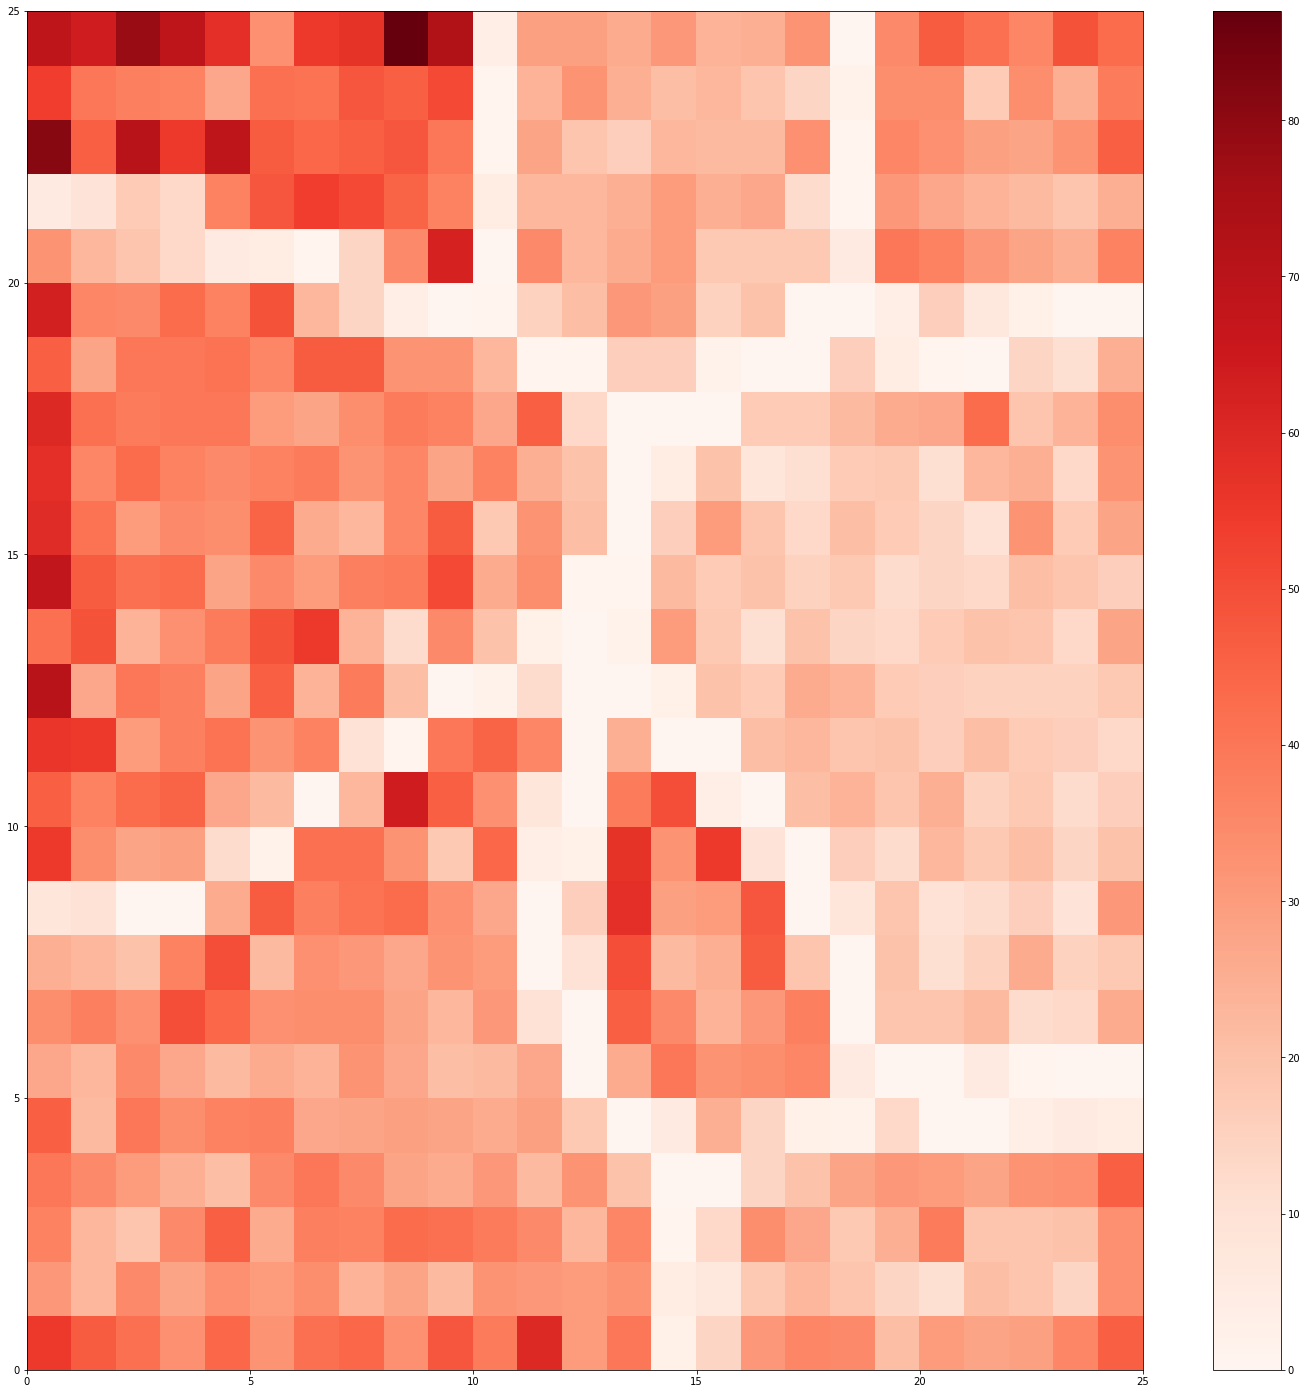

In [37]:
# hit map
plt.figure(figsize=(grid[0], grid[1]))
frequencies = som.activation_response(X)
plt.pcolor(frequencies.T, cmap='Reds') 
plt.colorbar()
plt.show()

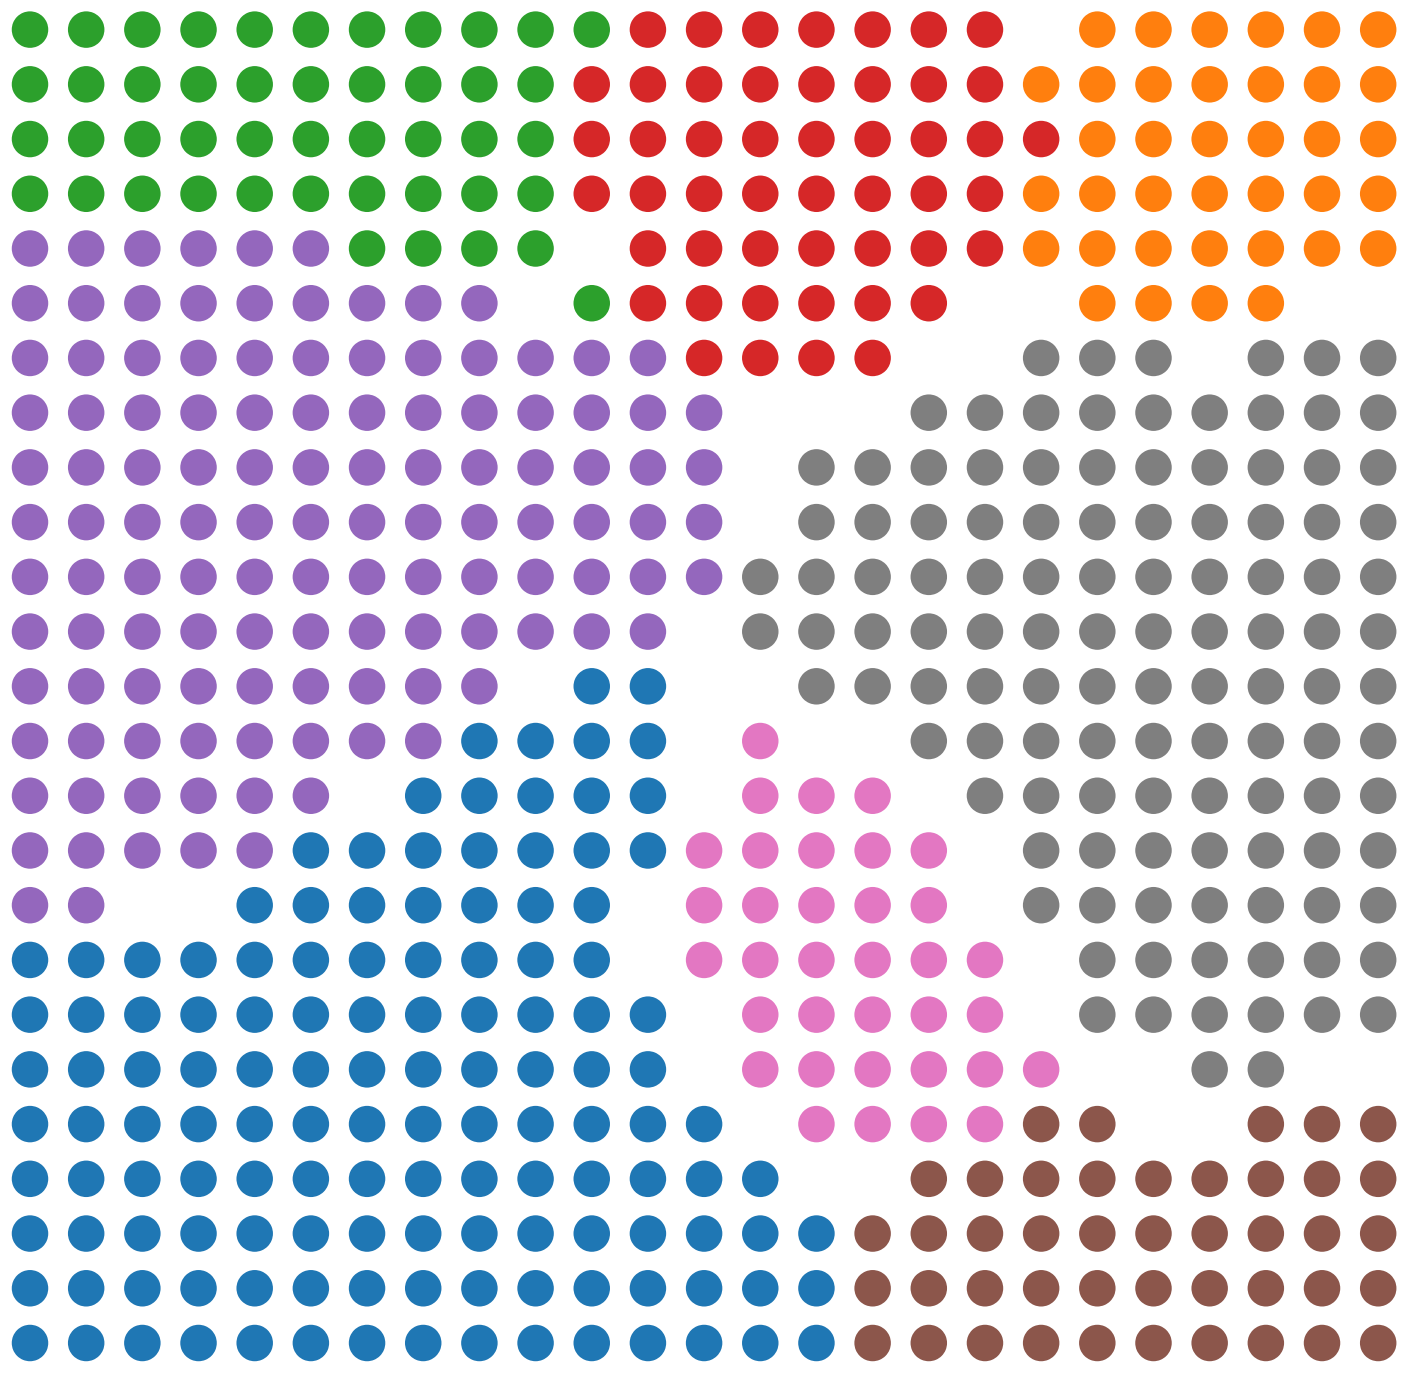

In [47]:
# Pi map
labels_map = som.labels_map(X, label)
label_names = np.unique(label)

plt.figure(figsize=(grid[0], grid[1]))
the_grid = GridSpec(grid[0], grid[1])
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[grid[0]-1-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
    
plt.show()